Let's perform a hypothesis test for a known population mean. We'll use a z-test for this example. Assume you have a sample and want to test if its mean is significantly different from a known population mean. We'll use matplotlib to visualize the results.

#### Hypothesis Testing Steps (One-Sample)

1. **State the Null and Alternative Hypothesis (H0):** 
    - This is the hypothesis that there is no significant difference or effect. It often includes an equal sign (=).

2. **Set the Significance Level (α):** This is the probability of rejecting the null hypothesis when it is true. Common choices are 0.05, 0.01, or 0.10.
   - the significance level (α) represents the probability of making a Type I error, which is the probability of rejecting a true null hypothesis.
   - It is explicitly chosen by the researcher before conducting the test. Common choices are 0.05, 0.01, etc.

3. **Collect and Analyze Data:**
   - Collect a sample of data relevant to the hypothesis.
   - Summarize the data using appropriate descriptive statistics (mean, standard deviation, etc.).
   - Choose the Appropriate Test Statistic, For a one-sample test, if you know the population standard deviation, you might use a z-test. If not, a t-test is more common.


4. **Choose the Appropriate Statistical Test**
    - The choice of statistical test depends on the nature of the data and the hypothesis being tested. Common tests include t-tests, chi-square tests, ANOVA, regression, etc.
    - calculating the test statistic involves determining how many standard deviations the sample mean ($\bar{x}$) is away from the hypothesized population mean ($\mu$) in a standard normal distribution. This is done using the formula:
    $[ Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}]$

5. **Determine the Critical Region**
   - Based on the chosen significance level (α), determine the critical region (the range of values that would lead to rejecting the null hypothesis).
   - The critical value is used to define the rejection region(s) in a hypothesis test.
   - It represents the boundary beyond which you would reject the null hypothesis.
   - For a two-tailed test with a significance level of α, it corresponds to the z-score that leaves α/2 in the upper tail and α/2 in the lower tail of the standard normal distribution.

6. **Draw a Conclusion:**
    - Compare the calculated test statistic with the critical value(s) or use p-values to make a decision.
    - If the test statistic falls into the critical region, reject the null hypothesis in favor of the alternative hypothesis. If not, fail to reject the null hypothesis.
    - Based on the decision in step 8, conclude whether there is enough evidence to reject the null hypothesis or not.

**Note:** The steps may vary slightly based on the specific hypothesis test being used (z-test, t-test, etc.) and the characteristics of the data.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [1]:
np.random.seed(42)

# Population parameters for female height
population_mean = 64
population_std = 3

# Step 1: Define null and alternative hypotheses
null_hypothesis_mean = 64

# Step 2: Choose significance level
alpha = 0.05  # significance level = (1 - confidence_interval 0.95)

# Step 3: Collect a sample of data
sample_size = 500
sample = stats.norm.rvs(loc=population_mean, scale=population_std, size=sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)     # Use ddof=1 for sample standard deviation

# Step 4: Compute test statistic - determining how many STD the sample mean is away from the hypothesized population mean
z_statistics = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Step 5: Determine the Critical Region
critical_value = stats.norm.ppf(1 - alpha / 2)  # Use ppf for inverse CDF
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistics)))  # Multiply by 2 for a two-tailed test

# Step 6: Make a Decision
if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

x_values   = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)
pdf_values = stats.norm.pdf(x_values, loc=sample_mean, scale=sample_std)
cdf_values = stats.norm.cdf(x_values, loc=sample_mean, scale=sample_std)


# Find the cumulative probabilities corresponding to the z-scores
cdf_lower_bound = cdf_values <= alpha / 2
cdf_upper_bound = cdf_values >= 1 - alpha / 2

# Plot the sample distribution
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=25, density=True, color='skyblue', alpha=0.7, label="Female Heights Distribution")
plt.title('Sample Distribution of Female Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Density')

# Plot PDF using np.linspace and stats.norm.pdf
plt.plot(x_values, pdf_values, color='orange', label='PDF')

# draw the two tails
plt.fill_between(x_values, pdf_values, where=cdf_lower_bound, color='green', alpha=0.4, label="lower bound (0.05)")
plt.fill_between(x_values, pdf_values, where=cdf_upper_bound, color='green', alpha=0.4, label="Shaded Area (0.95)")

# Highlight the sample mean
plt.axvline(sample_mean, color='green', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.legend()
plt.show()

print(f"Critical value: {critical_value:.4f}")
print(f"Test Statistic (z): {z_statistics:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


NameError: name 'np' is not defined

In [21]:
# Step 5: Determine the Critical Region
critical_value_left  = stats.norm.ppf(alpha / 2)
critical_value_right = stats.norm.ppf(1 - alpha / 2)

# Step 6: Make a Decision
absolute_z_statistics = np.abs(z_statistics)

reject_null_hypothesis = absolute_z_statistics > critical_value_right or absolute_z_statistics < critical_value_left

print(f"Critical Value (Left): {critical_value_left:.4f}")
print(f"Critical Value (Right): {critical_value_right:.4f}")
print(f"Absolute Value of z_statistics: {absolute_z_statistics:.4f}")

if reject_null_hypothesis:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Critical Value (Left): -1.9600
Critical Value (Right): 1.9600
Absolute Value of z_statistics: 0.1529
Fail to reject the null hypothesis.


#### Hypothesis Test using statsmodels

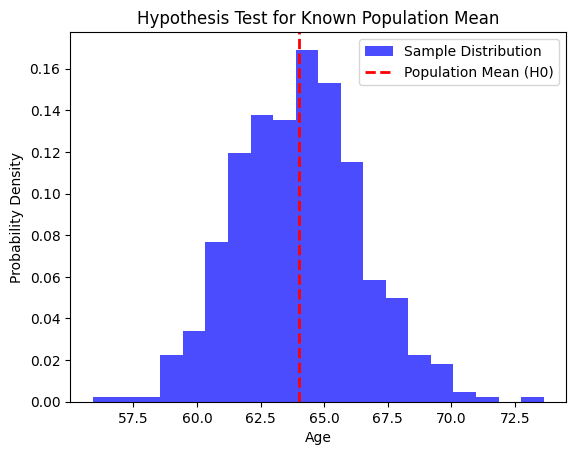

Z-statistic: 0.1558
P-value: 0.8762
Null Hypothesis Rejected: False


In [23]:
# Set seed for reproducibility
np.random.seed(42)

# Known population parameters
population_mean = 64
population_std  = 2.5

# Generate sample data
sample_size = 500
sample_ages = np.random.normal(population_mean, population_std, sample_size)

# Set the null hypothesis (H0) - Let's say the population mean is 30
null_hypothesis_mean = 64

# Perform one-sample z-test
z_stat, p_value = ztest(sample_ages, value=null_hypothesis_mean)

# Set significance level (alpha)
alpha = 0.05

# Check if the null hypothesis can be rejected
reject_null_hypothesis = p_value < alpha

# Plot the sample distribution and the null hypothesis mean
plt.hist(sample_ages, bins=20, density=True, alpha=0.7, color='blue', label='Sample Distribution')

plt.axvline(null_hypothesis_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean (H0)')

# Set labels and legend
plt.title('Hypothesis Test for Known Population Mean')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Display the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Null Hypothesis Rejected: {reject_null_hypothesis}")
